In [7]:
if(!require(devtools)){
    install.packages("devtools", dependencies = T)
    library(devtools)
}
#install.packages("rlang")
#install.packages("tidyverse", dependencies = TRUE)
library(ggplot2)
if(!require(ggthemes)){
    install.packages("ggthemes", dependencies = T)
    library(ggthemes)
}
## plota o grid dos boxplots
if(!require(cowplot)){
    install.packages("cowplot", dependencies = T)
    library(cowplot)
}
#if(!require(ggplot2)){
#    install.packages("ggplot2", dependencies = T)
#    library(ggplot2)
#}

## Dados CV AFS géis eluídos
CV_24h = c(0.0258, 0.0304, 0.0240, 0.0201, 0.0203, 0.0207)
CV_120h = c(0.0730, 0.0815, 0.0569, 0.0803, 0.0544, 0.0560)

dat <- data.frame(cond = factor(rep(c("CV AFS 024h","CV AFS 120h"), each=6)), 
                  rating = c(CV_24h,CV_120h))

p <- ggplot(dat, aes(x=cond, y=rating, color=cond)) + 
    stat_boxplot(geom ='errorbar', width = 0.15) +
    geom_boxplot(width = .3, coef = 1000) + 
    #scale_color_manual(values=c("#00008B", "#556B2F")) +
    #stat_boxplot(geom ='errorbar', width = 0.15) +
    #geom_boxplot(width = 0.2, fill = "lightgrey") +
    expand_limits(y = 0) +
    scale_y_continuous(sec.axis = dup_axis(label = NULL, 
                                         name = NULL),
                     expand = expand_scale(mult = c(0, 0)),
                     breaks = pretty(c(0,0.1), n = 5), 
                     limits = c(0,0.1)) +
    #scale_color_stata("s2color") +
    ylab("Hg")

#p + theme_stata() + scale_color_stata()

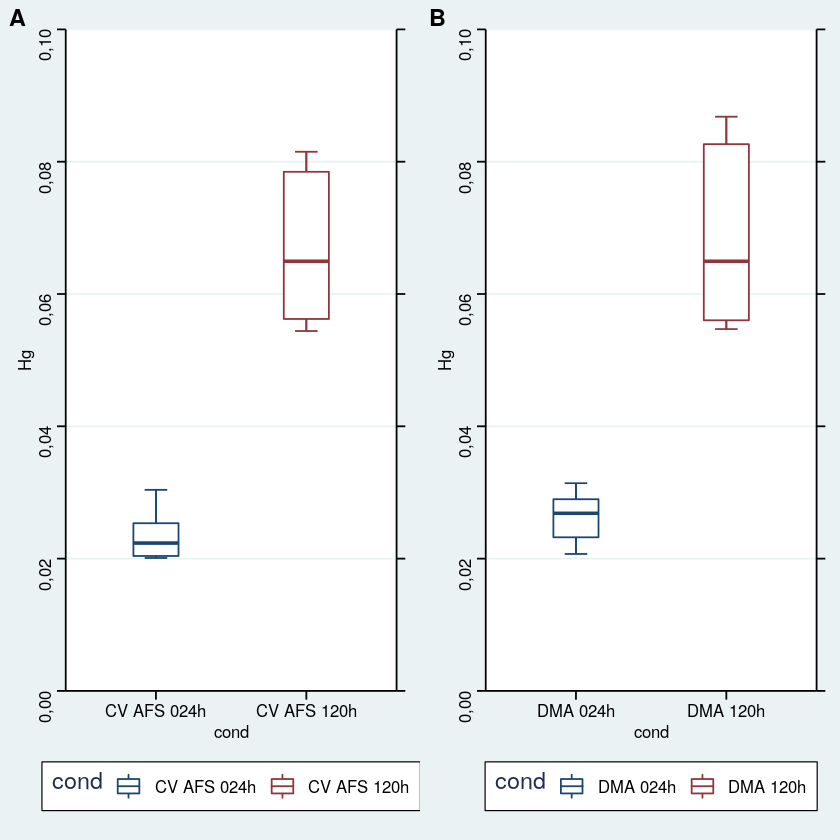

In [8]:
## Dados DMA queima direta
DMA_24h = c(0.0260, 0.0314, 0.0294, 0.0277, 0.0223, 0.0207)
DMA_120h = c(0.0708, 0.0868, 0.0591, 0.0866, 0.0550, 0.0547)

dat <- data.frame(cond = factor(rep(c("DMA 024h","DMA 120h"), each=6)), 
                  rating = c(DMA_24h,DMA_120h))

p2 <- ggplot(dat, aes(x=cond, y=rating, color=cond)) + 
    stat_boxplot(geom ='errorbar', width = 0.15) +
    geom_boxplot(width = .3, coef = 1000) + 
    #scale_color_manual(values=c("#00008B", "#556B2F")) +
    #stat_boxplot(geom ='errorbar', width = 0.15) +
    #geom_boxplot(width = 0.2, fill = "lightgrey") +
    expand_limits(y = 0) +
    scale_y_continuous(sec.axis = dup_axis(label = NULL, 
                                         name = NULL),
                     expand = expand_scale(mult = c(0, 0)),
                     breaks = pretty(c(0,0.1), n = 5), 
                     limits = c(0,0.1)) +
    #scale_color_stata("s2color") +
    ylab("Hg")

#p2 + theme_stata() + scale_color_stata()

plot_grid(p + theme_stata() + scale_color_stata(), 
          p2 + theme_stata() + scale_color_stata(), labels = "AUTO")


# Teste de normalidade

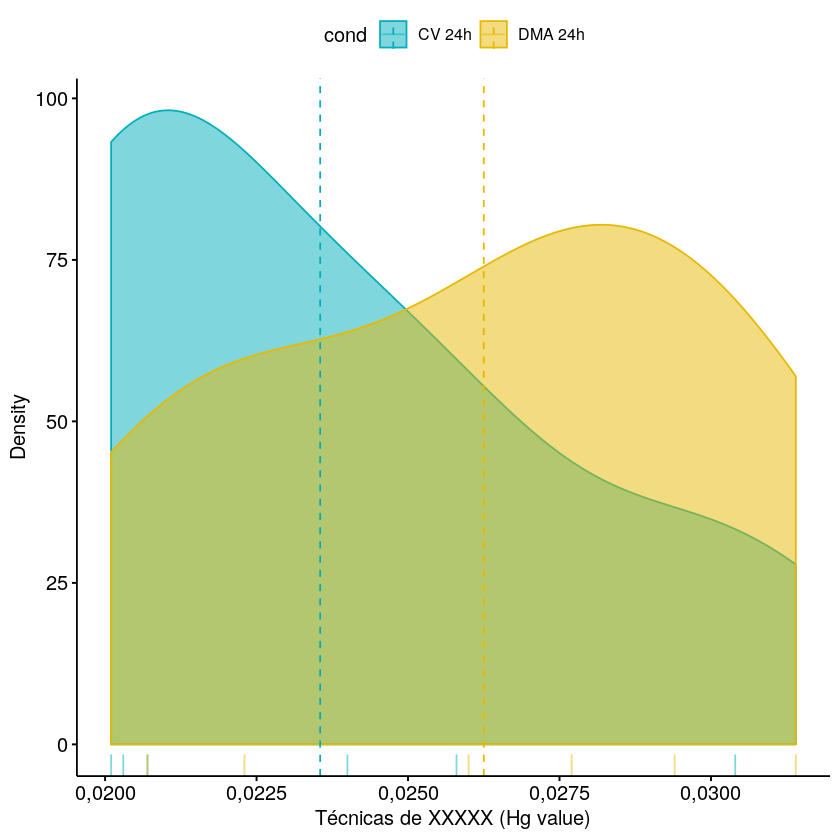

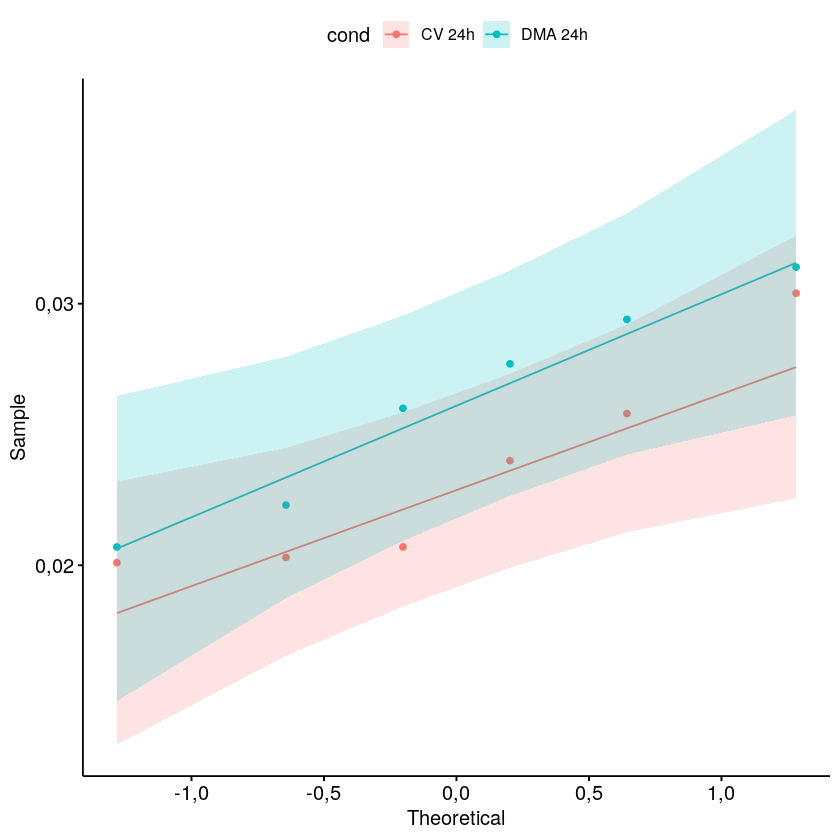

In [45]:
## The ggpubr R package facilitates the creation of beautiful ggplot2-based graphs 
## for researcher with non-advanced programming backgrounds.
if(!require(ggpubr)){
    install.packages("ggpubr", dependencies = T)
    library(ggpubr)
}

dat <- data.frame(cond = factor(rep(c("CV 24h","DMA 24h"), each=6)), 
                  rating = c(CV_24h, DMA_24h))

ggdensity(dat, x = "rating", add = "mean",
          rug = TRUE,
          color = "cond",
          fill = "cond",
          palette = c("#00AFBB", "#E7B800"),    
          xlab = "Técnicas de XXXXX (Hg value)",
          ylab = "Density")

## @TODO 
##     verificar ylab e palette
ggqqplot(dat, 
         x = "rating", 
         color = "cond", 
         fill = "cond")

## realiza o shapiro test for 24h techniques

Dado que o valor p > 0.05, então a amostra não difere da normalidade

In [55]:
ans = shapiro.test(dat[grep("CV 24h", dat$cond, ignore.case=T),]$rating)

paste("O valor p foi para CV 24h: ", ans$p.value);

ans = shapiro.test(dat[grep("DMA 24h", dat$cond, ignore.case=T),]$rating)

paste("O valor p foi para DMA 24h: ", ans$p.value);

[1] "O valor p foi para CV 24h:  0,204024411831543"

[1] "O valor p foi para DMA 24h:  0,801250709623691"

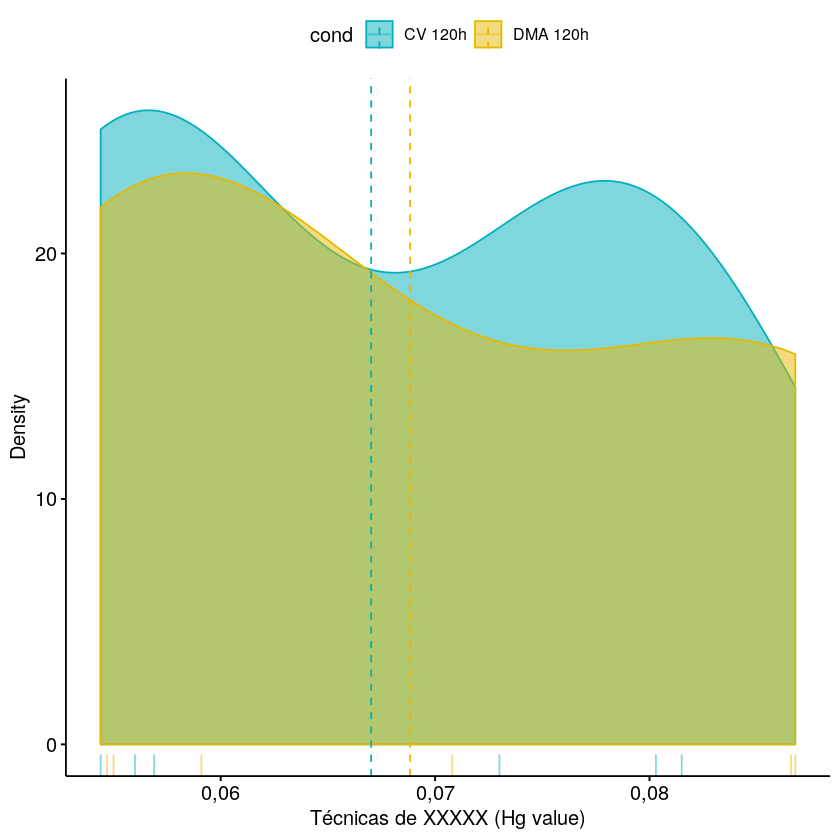

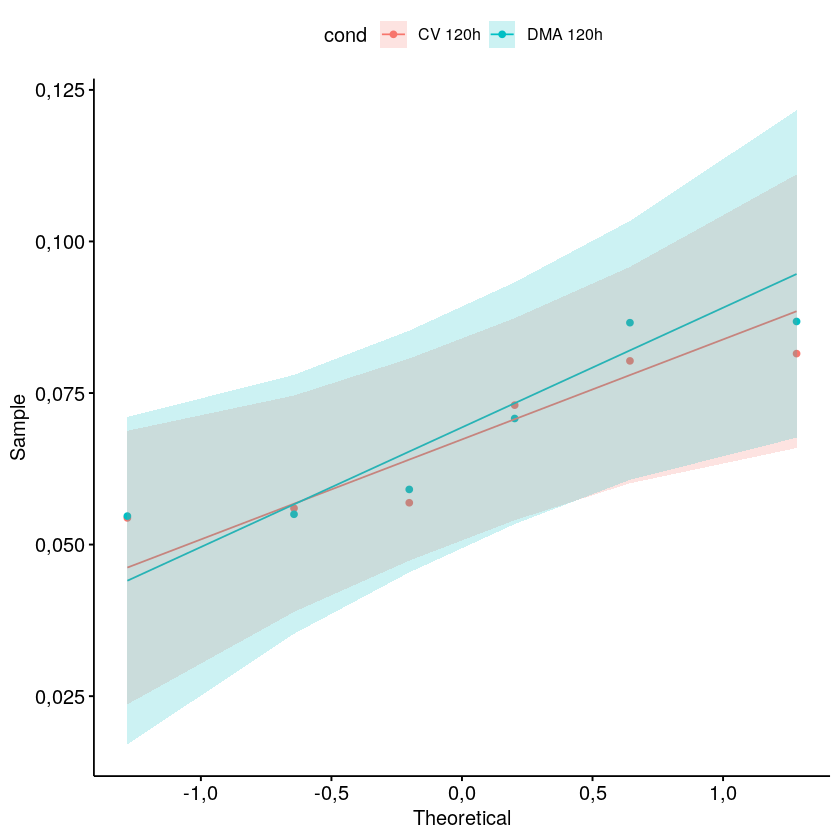

In [58]:
## The ggpubr R package facilitates the creation of beautiful ggplot2-based graphs 
## for researcher with non-advanced programming backgrounds.
if(!require(ggpubr)){
    install.packages("ggpubr", dependencies = T)
    library(ggpubr)
}

dat <- data.frame(cond = factor(rep(c("CV 120h","DMA 120h"), each=6)), 
                  rating = c(CV_120h, DMA_120h))

ggdensity(dat, x = "rating", add = "mean",
          rug = TRUE,
          color = "cond",
          fill = "cond",
          palette = c("#00AFBB", "#E7B800"),    
          xlab = "Técnicas de XXXXX (Hg value)",
          ylab = "Density")

## @TODO 
##     verificar ylab e palette
ggqqplot(dat, 
         x = "rating", 
         color = "cond", 
         fill = "cond")

## realiza o shapiro test for 120h techniques

Dado que o valor p > 0.05, então a amostra não difere da normalidade

In [59]:
ans = shapiro.test(dat[grep("CV 120h", dat$cond, ignore.case=T),]$rating)

paste("O valor p foi para CV 24h: ", ans$p.value);

ans = shapiro.test(dat[grep("DMA 120h", dat$cond, ignore.case=T),]$rating)

paste("O valor p foi para DMA 24h: ", ans$p.value);

[1] "O valor p foi para CV 24h:  0,0855690612234013"

[1] "O valor p foi para DMA 24h:  0,101080692395924"

# Primeiro testo a variancia e t-test para as duas técnicas com 24h e depois com 120h

Dado que p-value > 0.05 para as duas amostras, então concluimos que  
there is no significant difference between the two variances.

In [62]:
cat("##################################################################\n")
cat("##################### TESTE DE VARIÂNCIA 24h #####################\n")
cat("##################################################################\n")
ans = var.test(DMA_24h, CV_24h, ratio = 1, alternative = "two.sided", conf.level = 0.95)
ans

#cat("\n\n\nO valor p foi: ")
paste("O valor p foi: ", ans$p.value);
cat()

paste("O valor f foi: ", ans$statistic);
cat()

### Como p-value > 0.05, entao resultado do teste de variancia mostra que
### there is no significant difference between the two variances.

#t.test(c1, c2, alternative = "greater" ,mu = 0, paired = FALSE, var.equal = FALSE, conf.level = 0.95)

#2 questao

#N = c(22, 21, 28, 30, 33, 33, 26, 24, 31, 22)
#A = c(25, 28, 26, 36, 32, 39, 28, 33, 30, 27)

#t.test(N, A, alternative = "less" ,mu = 0, paired = TRUE, var.equal = FALSE, conf.level = 0.95)

#3 questao

#prop.test(x = c(12, 100), n = c(22, 400), alternative="two.sided", correct = FALSE)
#p.test <- prop.test(x = c(12, 100), n = c(22, 400), alternative="two.sided", correct = FALSE)
#z_0 <- sign(0.150-0.178)*sqrt(p.test$statistic[[1]]); z_0

##################################################################
##################### TESTE DE VARIÂNCIA 24h #####################
##################################################################



	F test to compare two variances

data:  DMA_24h and CV_24h
F = 1,0271, num df = 5, denom df = 5, p-value = 0,9773
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0,1437177 7,3397723
sample estimates:
ratio of variances 
          1,027061 


[1] "O valor p foi:  0,977338320234578"

[1] "O valor f foi:  1,02706131078224"

In [63]:
DMA_24h = c(0.0260, 0.0314, 0.0294, 0.0277, 0.0223, 0.0207)
DMA_120h = c(0.0708, 0.0868, 0.0591, 0.0866, 0.0550, 0.0547)
CV_24h = c(0.0258, 0.0304, 0.0240, 0.0201, 0.0203, 0.0207)
CV_120h = c(0.0730, 0.0815, 0.0569, 0.0803, 0.0544, 0.0560)

cat("###################################################################\n")
cat("##################### TESTE DE VARIÂNCIA 120h #####################\n")
cat("###################################################################\n")
ans = var.test(DMA_120h, CV_120h, ratio = 1, alternative = "two.sided", conf.level = 0.95)
ans

#cat("\n\n\nO valor p foi: ")
paste("O valor p foi: ", ans$p.value);
cat()

paste("O valor f foi: ", ans$statistic);
cat()

#t.test(c1, c2, alternative = "greater" ,mu = 0, paired = FALSE, var.equal = FALSE, conf.level = 0.95)

#2 questao

#N = c(22, 21, 28, 30, 33, 33, 26, 24, 31, 22)
#A = c(25, 28, 26, 36, 32, 39, 28, 33, 30, 27)

#t.test(N, A, alternative = "less" ,mu = 0, paired = TRUE, var.equal = FALSE, conf.level = 0.95)

#3 questao

#prop.test(x = c(12, 100), n = c(22, 400), alternative="two.sided", correct = FALSE)
#p.test <- prop.test(x = c(12, 100), n = c(22, 400), alternative="two.sided", correct = FALSE)
#z_0 <- sign(0.150-0.178)*sqrt(p.test$statistic[[1]]); z_0

###################################################################
##################### TESTE DE VARIÂNCIA 120h #####################
###################################################################



	F test to compare two variances

data:  DMA_120h and CV_120h
F = 1,4016, num df = 5, denom df = 5, p-value = 0,7201
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  0,1961296 10,0164914
sample estimates:
ratio of variances 
          1,401617 


[1] "O valor p foi:  0,720058134818644"

[1] "O valor f foi:  1,40161716137448"

## Teste t

In [72]:
cat("######################################################\n")
cat("##################### T-TEST 24h #####################\n")
cat("######################################################\n")

t.test(DMA_24h, CV_24h, alternative = "two.sided" ,mu = 0, paired = FALSE, var.equal = FALSE, conf.level = 0.95)

######################################################
##################### T-TEST 24h #####################
######################################################



	Welch Two Sample t-test

data:  DMA_24h and CV_24h
t = 1,1417, df = 9,9982, p-value = 0,2802
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0,00256957  0,00796957
sample estimates:
mean of x mean of y 
  0,02625   0,02355 


In [74]:
cat("#######################################################\n")
cat("##################### T-TEST 120h #####################\n")
cat("#######################################################\n")

t.test(DMA_120h, CV_120h, alternative = "two.sided" ,mu = 0, paired = FALSE, var.equal = FALSE, conf.level = 0.95)

#######################################################
##################### T-TEST 120h #####################
#######################################################



	Welch Two Sample t-test

data:  DMA_120h and CV_120h
t = 0,22631, df = 9,728, p-value = 0,8256
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0,01613710  0,01977043
sample estimates:
 mean of x  mean of y 
0,06883333 0,06701667 
